<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

**1. Загрузить датасет**

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### В дата сете нет отсутствующих значений
---

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
print('The number of fraudulent transactions:', len(dataset[dataset['Class']==1]))
print('The number of fair transactions:', len(dataset[dataset['Class']==0]))

The number of fraudulent transactions: 492
The number of fair transactions: 284315


In [5]:
grouped_by_class= dataset.groupby('Class').count().reset_index()

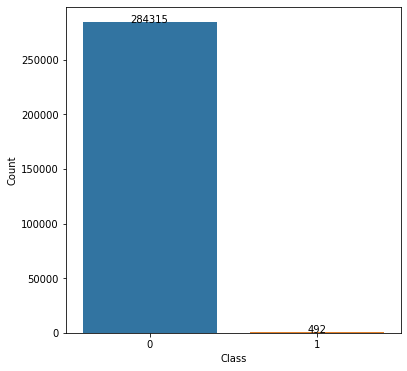

In [6]:
f, ax = plt.subplots(figsize=(6, 6))
g = sns.barplot(x='Class', y='Time', data=dataset.groupby('Class').count().reset_index())
plt.xlabel('Class')
plt.ylabel('Count')
for index, row in grouped_by_class.iterrows():
    g.text(row.Class, row.Time, row.Time, color='black', ha="center")

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [7]:
fraud = dataset[dataset['Class']==1]['Amount']
fair = dataset[dataset['Class']==0]['Amount']
print('Total amount for fraudulent transactions:', sum(fraud))
print('Total amount for fair transactions:', sum(fair))

Total amount for fraudulent transactions: 60127.96999999997
Total amount for fair transactions: 25102462.039983638


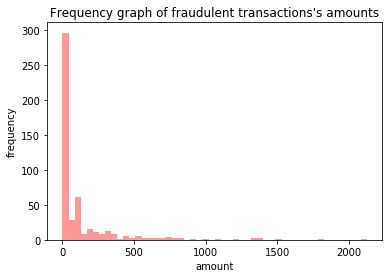

In [8]:
sns.distplot(fraud, kde = False, color='r')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('Frequency graph of fraudulent transactions\'s amounts')
plt.show()

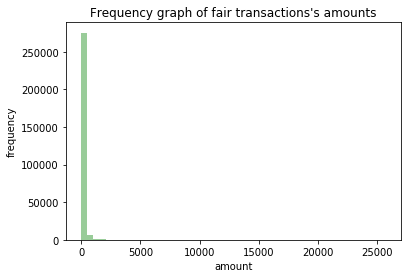

In [9]:
sns.distplot(fair, kde = False, color='g')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('Frequency graph of fair transactions\'s amounts')
plt.show()

**5. Построить графики histograms для всех значений**

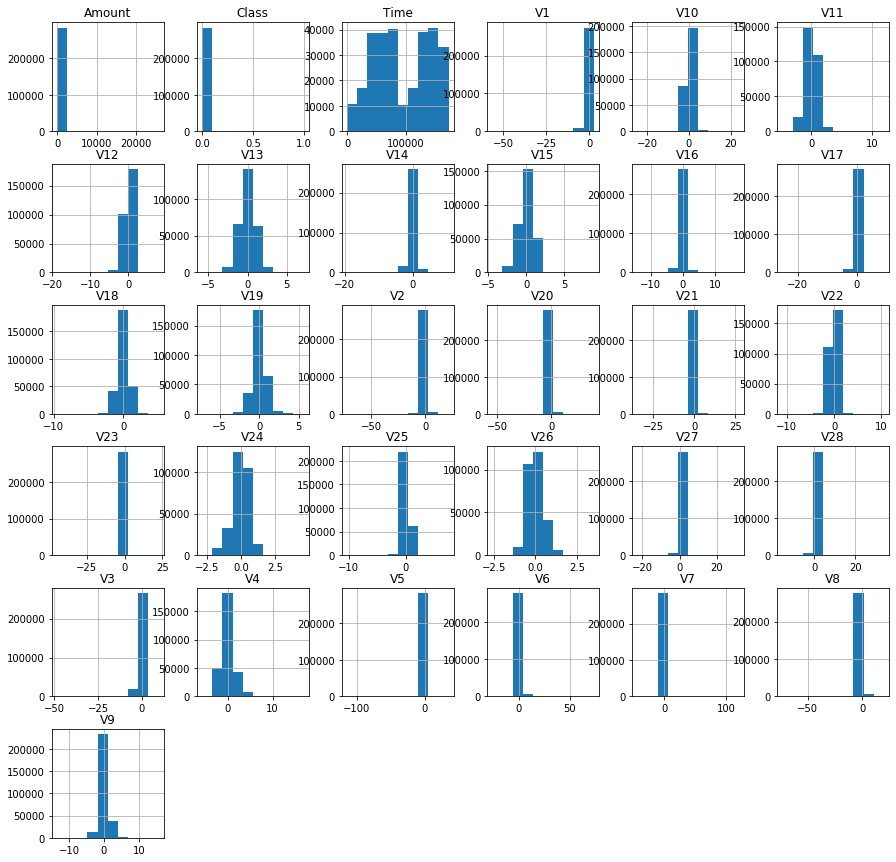

In [10]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

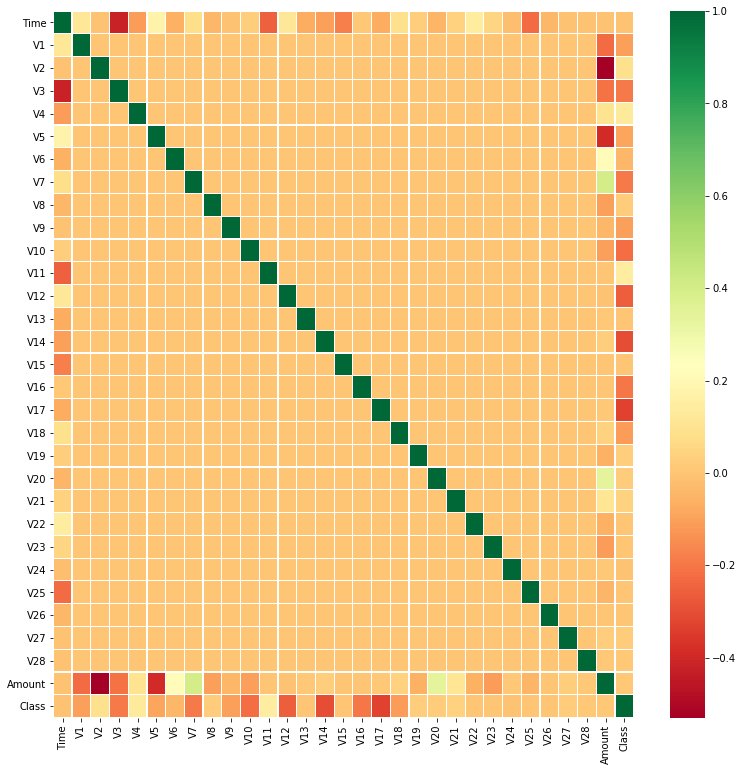

In [11]:
f, ax = plt.subplots(figsize=(13,13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr, annot=False, cmap='RdYlGn', linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [12]:
data = dataset.iloc[:, :-1]
input_x = data
output_y = dataset['Class']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(output_y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [15]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.92      0.74      0.82       155

    accuracy                           1.00     85443
   macro avg       0.96      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



0.9994148145547324

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [17]:
headers = list(data.columns.values)

In [18]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.columns = headers
data_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [19]:
input_x_norm = data_norm

In [20]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(input_x_norm, Y, test_size=0.3)

In [21]:
model=RandomForestClassifier(n_estimators=100)
model.fit(Xn_train, yn_train)

RandomForestClassifier()

In [22]:
model_predict = model.predict(Xn_test)

print(classification_report(yn_test, model_predict))

model.score(Xn_test, yn_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.93      0.77      0.85       142

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.9995318516437859

##### Все метрики нормализованных и не нормализованных данных либо не отличаются, либо отличаются незначительно, но в 
##### лучшую сторону для нормализованных данных. 
##### Если данные нормализовать, то результат будет немного лучше.
---

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(Xn_train, yn_train)
X_resampled, y_resampled = ros.fit_sample(Xn_train, yn_train)
print(f'Xn_train length: {len(Xn_train)}, length after resampling: {len(X_resampled)}')

Xn_train length: 199364, length after resampling: 398028


In [26]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199014, 1: 199014}

##### После увеличения количества тренировочных данных с 199364 до 398028, мы уровняли классы по количеству данных (в каждом 
##### классе стало одинаковое количество, равное 199014).
---